In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import pickle

In [2]:
# Load train and test datasets
train = pd.read_csv(r'data/train.csv', sep=';')
test = pd.read_csv(r'data/train.csv', sep=';')

# Concatenate train and test datasets for balancing the classes
train = pd.concat([train, test])

In [3]:
# Check the distribution of the target variable
train['y'].value_counts()

y
no     79844
yes    10578
Name: count, dtype: int64

In [4]:
# Get the number of 'yes' samples
yes_sample_size = train['y'].value_counts()['yes']

# Balance the dataset by sampling 'no' class to match 'yes' class count
temp = train[train['y'] == 'no'].sample(n=yes_sample_size)

In [5]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
# Filter out 'no' samples from the train dataset to concatenate with the sampled 'no' class
train = train[train['y'] != 'no']

In [7]:
# Combine the balanced 'no' samples with 'yes' samples
train = pd.concat([train, temp])

In [8]:
# Verify the balancing of the classes
train['y'].value_counts()

y
yes    10578
no     10578
Name: count, dtype: int64

In [9]:
# Check for any missing values in the dataset
train.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [10]:
# EDA

In [11]:
# Identify numerical columns in the dataset
numerical_cols = train.select_dtypes(include=['number']).columns.tolist()
print(numerical_cols)


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [12]:
# Display the min and max values for each numerical column
for col in numerical_cols:
    print(f'{col}\t\tmin: {train[col].min()}\t\tmax: {train[col].max()}')

age		min: 18		max: 95
balance		min: -3313		max: 102127
day		min: 1		max: 31
duration		min: 1		max: 3881
campaign		min: 1		max: 58
pdays		min: -1		max: 854
previous		min: 0		max: 58


In [13]:
# Identify non-numerical columns in the dataset
non_numerical_cols = train.select_dtypes(exclude=['number']).columns.tolist()
print(non_numerical_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [14]:
# Initialize LabelEncoder and display the encoding for non-numerical columns
lab_enc = LabelEncoder()
for col in non_numerical_cols:
    lab_enc.fit(train[col])
    print(col)
    print(lab_enc.transform(lab_enc.classes_))
    print(lab_enc.classes_)
    print()

job
[ 0  1  2  3  4  5  6  7  8  9 10 11]
['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']

marital
[0 1 2]
['divorced' 'married' 'single']

education
[0 1 2 3]
['primary' 'secondary' 'tertiary' 'unknown']

default
[0 1]
['no' 'yes']

housing
[0 1]
['no' 'yes']

loan
[0 1]
['no' 'yes']

contact
[0 1 2]
['cellular' 'telephone' 'unknown']

month
[ 0  1  2  3  4  5  6  7  8  9 10 11]
['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']

poutcome
[0 1 2 3]
['failure' 'other' 'success' 'unknown']

y
[0 1]
['no' 'yes']



In [15]:
# Apply LabelEncoder to non-numerical columns
for col in non_numerical_cols:
    train[col] = lab_enc.fit_transform(train[col])

In [16]:
# Display the first few rows of the encoded train dataset
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
86,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
87,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
129,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
168,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


<Axes: >

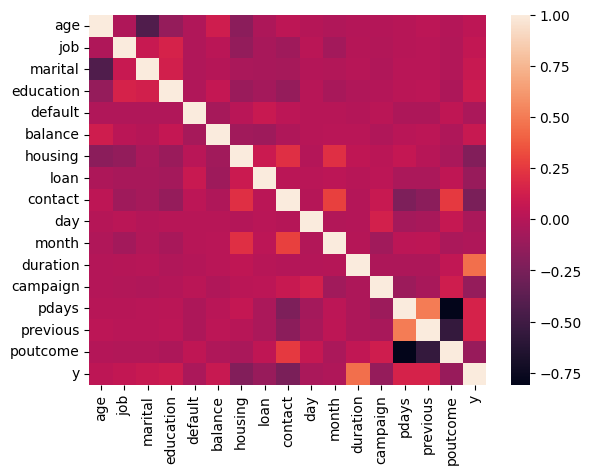

In [17]:
# Visualize the correlation matrix using a heatmap
import seaborn as sns
sns.heatmap(train.corr())

In [18]:
# Drop columns 'marital' and 'pdays' based on domain knowledge or correlation analysis
train = train.drop(['marital'], axis=1)
train = train.drop(['pdays'], axis=1)

In [19]:
# Separate features (X) and target (y) from the dataset
X = train.drop(['y'], axis=1)
y = train['y']

In [20]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [21]:
# Display the first few rows of the test dataset
X_test.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
30215,35,4,2,0,2707,0,0,0,5,3,699,1,0,3
44337,25,7,3,0,2022,0,0,0,29,5,276,8,12,1
39516,29,0,2,0,238,0,0,0,25,8,344,2,1,0
43216,26,8,1,0,5296,0,0,0,5,7,229,1,1,0
17344,40,7,1,0,473,1,0,0,28,5,383,3,0,3


In [22]:
# Function to train multiple models
def model(X_train, y_train):
  forest = RandomForestClassifier(n_estimators=10, random_state=0)
  forest.fit(X_train, y_train)
  print(f'Las: {forest.score(X_train, y_train)}')

  lreg = LogisticRegression(max_iter=7700)
  lreg.fit(X_train, y_train)
  print(f'Regresja logistyczna: {lreg.score(X_train, y_train)}')

  tree = DecisionTreeClassifier()
  tree.fit(X_train, y_train)
  print(f'Drzewa decyzyjne: {tree.score(X_train, y_train)}')

  return forest, lreg, tree

odel Evaluation: Random Fores# Train the models and get the trained model objects
forest, lreg, tree = model(X_train.values, y_train.values)

Las: 0.9968488056973593
Regresja logistyczna: 0.8003403289846852
Drzewa decyzyjne: 1.0


In [23]:
# Make predictions using the trained models
y1_predict = forest.predict(X_test.values)
print(f'Random Forest {accuracy_score(y_test, y1_predict)}')

y2_predict = lreg.predict(X_test.values)
print(f'Logistic Regresion {accuracy_score(y_test, y2_predict)}')

y3_predict = tree.predict(X_test.values)
print(f'Decision Tree {accuracy_score(y_test, y3_predict)}')

Random Forest 0.902060881073927
Logistic Regresion 0.8003403289846852
Decision Tree 0.8839100018907166


In [24]:
# Evaluate the performance of the RandomForestClassifier
print('Ocena modelu 1. Las')
print(classification_report(y_test, y1_predict))

Ocena modelu 1. Las
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      2582
           1       0.88      0.94      0.91      2707

    accuracy                           0.90      5289
   macro avg       0.90      0.90      0.90      5289
weighted avg       0.90      0.90      0.90      5289



In [25]:
# Evaluate the performance of the LogisticRegression model
print('Ocena modelu 2. Regresja logistyczna')
print(classification_report(y_test, y2_predict))

Ocena modelu 2. Regresja logistyczna
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      2582
           1       0.81      0.80      0.80      2707

    accuracy                           0.80      5289
   macro avg       0.80      0.80      0.80      5289
weighted avg       0.80      0.80      0.80      5289



In [26]:
# Evaluate the performance of the DecisionTreeClassifier
print('Ocena modelu 3. Drzewa decyzyjne')
print(classification_report(y_test, y3_predict))

Ocena modelu 3. Drzewa decyzyjne
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      2582
           1       0.86      0.93      0.89      2707

    accuracy                           0.88      5289
   macro avg       0.89      0.88      0.88      5289
weighted avg       0.89      0.88      0.88      5289



In [27]:
# Save the trained LogisticRegression model to a file
filename = r'../ml_models/banking_model.h5'
pickle.dump(lreg, open(filename, 'wb'))